In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")
print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 21.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = pd.read_csv(f"/content/insurance.csv")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


##Data PreProcessing

missing value


In [17]:
data.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0
region_northwest,0
region_southeast,0
region_southwest,0


duplicated rows

In [18]:
data.duplicated().sum()

1

In [22]:
# Remove duplicated rows
data = data.drop_duplicates()


In [24]:
data.shape

(1337, 9)

In [25]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [30]:
# Ensure columns exist before encoding
categorical_columns = ["sex", "smoker", "region"]

In [31]:
# Check which columns exist in the dataset and apply encoding
for col in categorical_columns:
    if col in data.columns:
        print(f"Encoding column: {col}")
    else:
        print(f"Column {col} not found in the dataset")

Column sex not found in the dataset
Column smoker not found in the dataset
Column region not found in the dataset


## Categorical data encodeing

In [32]:
# Perform one-hot encoding on valid categorical columns
data_encoded = pd.get_dummies(data, columns=[col for col in categorical_columns if col in data.columns], drop_first=True)
print(data_encoded.head())


   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


##Data Analysis

In [33]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


##Data Visualization

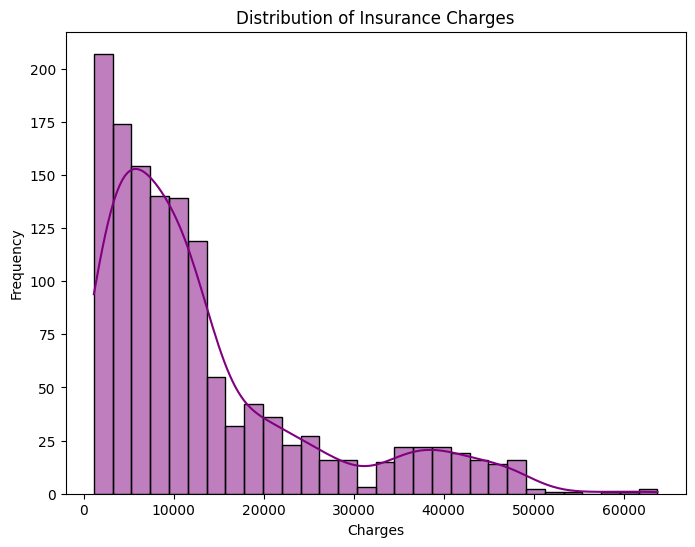

In [34]:
#Distribution of charges (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(data["charges"], kde=True, color='purple', bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

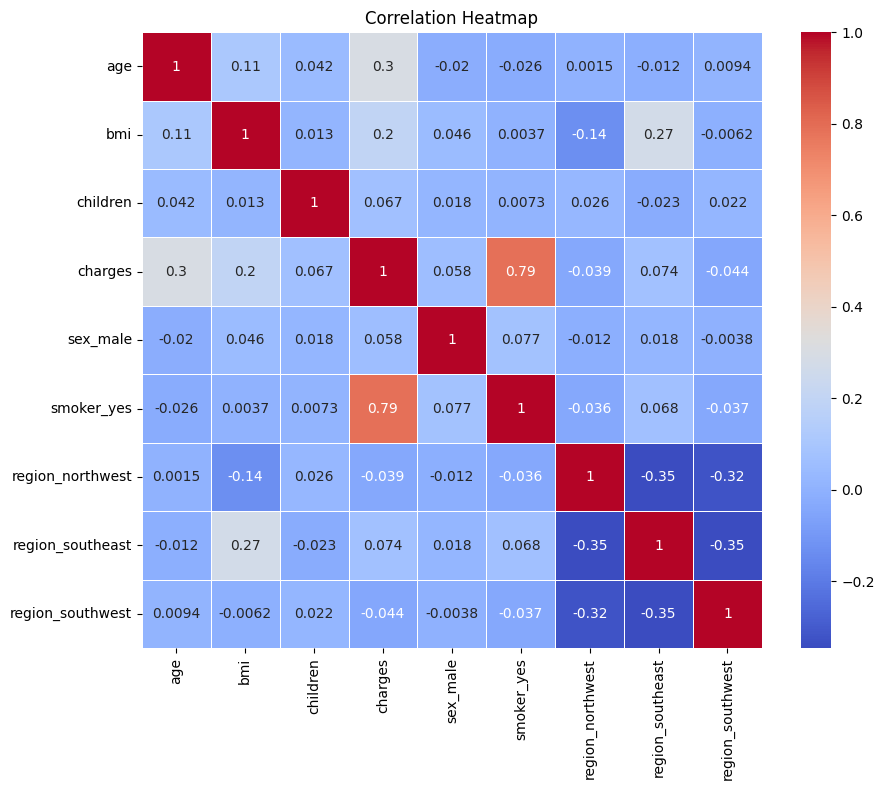

In [35]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

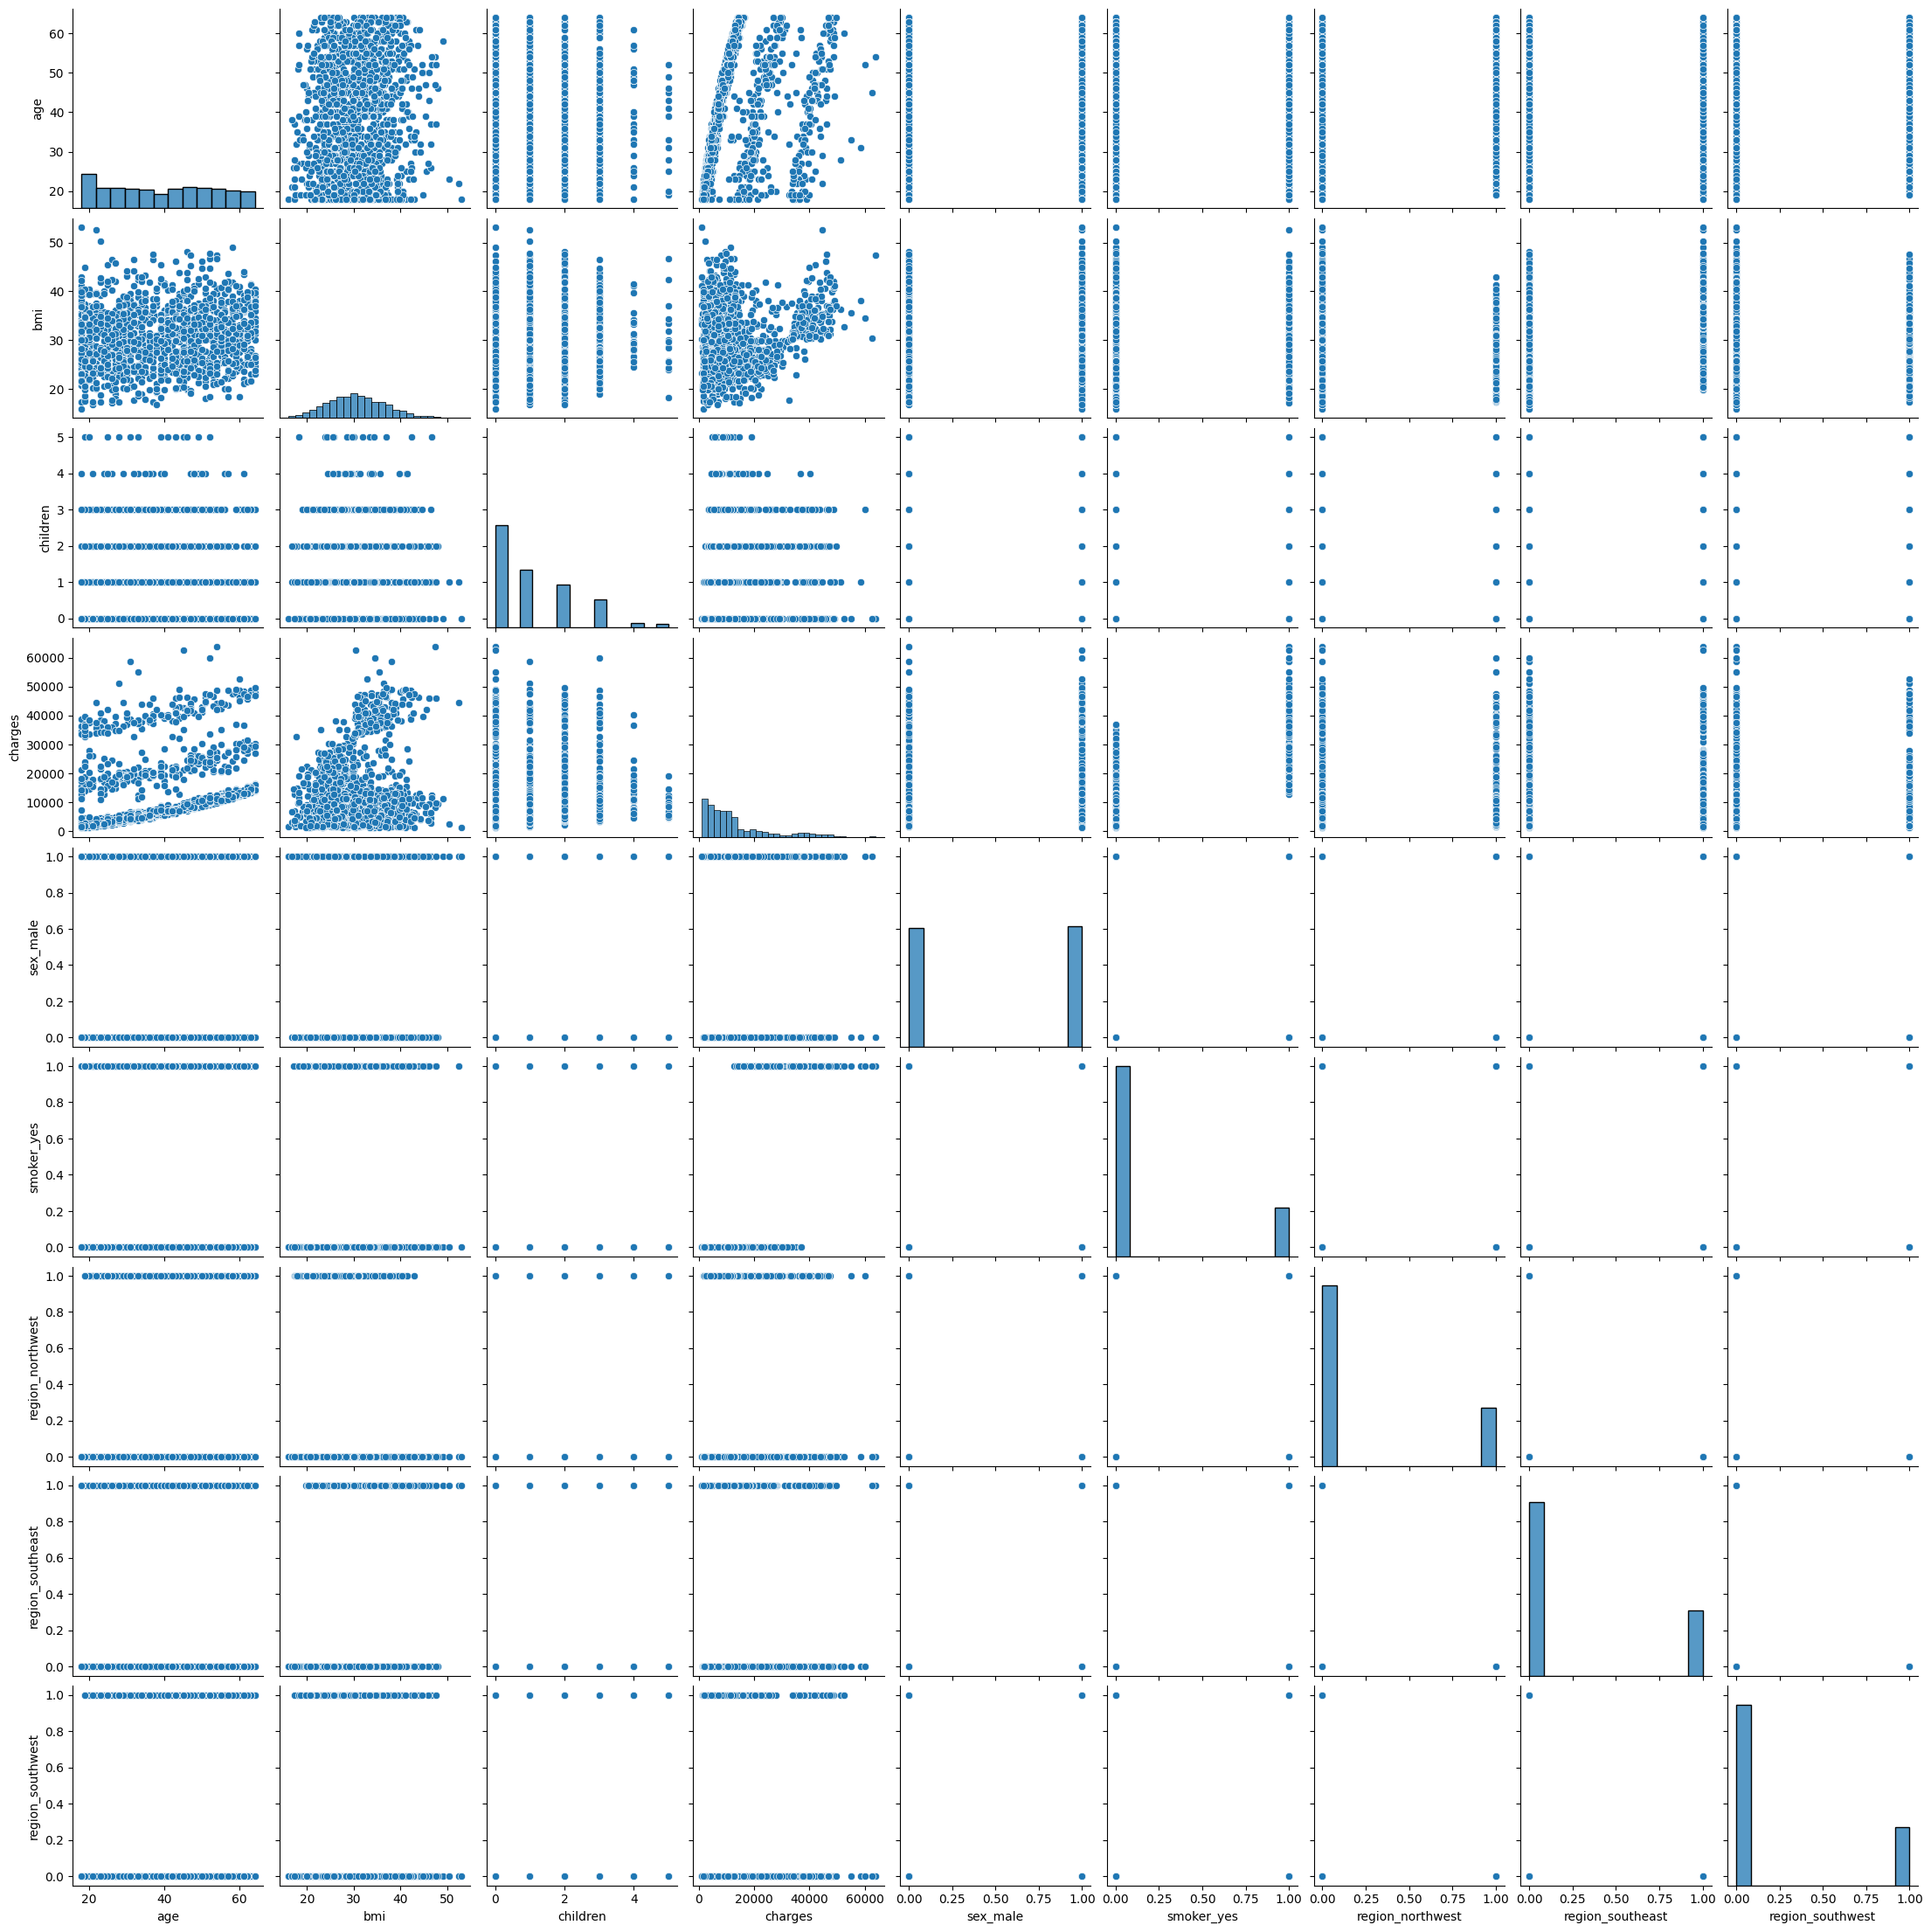

In [36]:
#Pair Plot (to visualize relationships between numerical variables)
sns.pairplot(data)
plt.show()

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


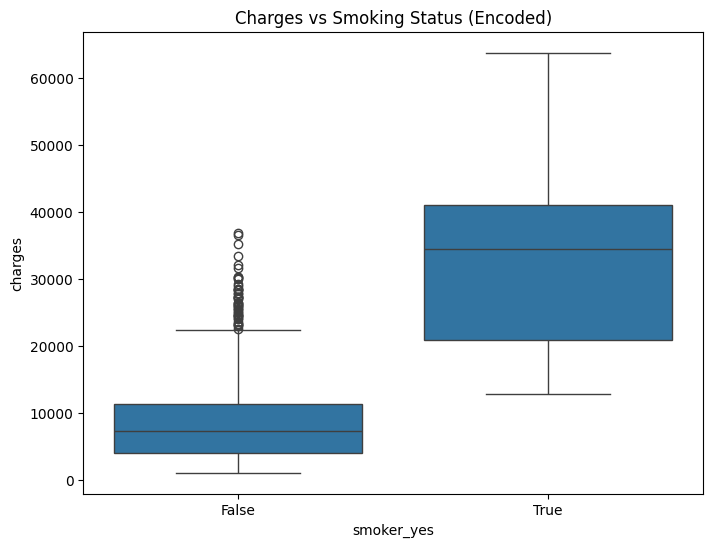

In [39]:
# Check the columns of the encoded dataset to find the correct names
print(data_encoded.columns)

# Box plot using encoded columns (example if 'smoker_yes' is the new column name)
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_yes', y='charges', data=data_encoded)
plt.title('Charges vs Smoking Status (Encoded)')
plt.show()

In [40]:
corr = data.corr(numeric_only=True)

In [41]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


##Model Training

In [42]:
#Split data into features (X) and target (y)
X = data_encoded.drop("charges", axis=1)  # Features (all except 'charges')
y = data_encoded["charges"]               # Target variable ('charges')

In [43]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [46]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Model Performance:
Mean Squared Error (MSE): 35478020.67523561
R-squared (R²): 0.8069287081198011


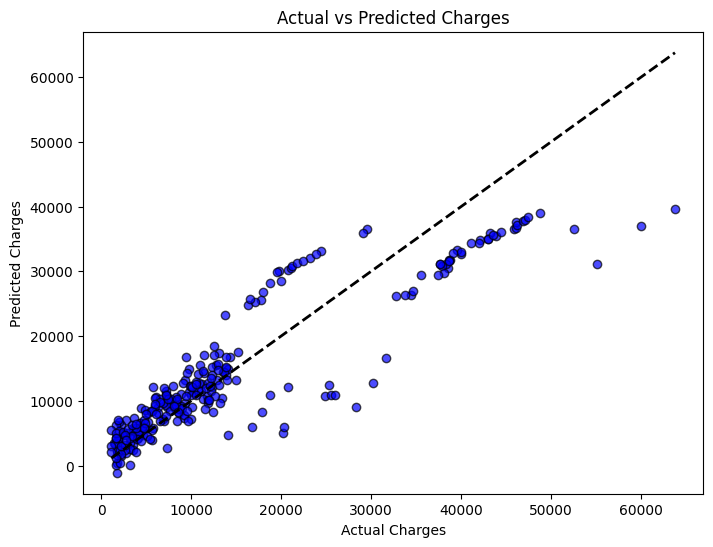

In [47]:
#Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()